# Setting up a custom model
In principle, any custom model can be used in ALPro. This tutorial allows shows how to set up a model with any given profile of magnetic field and density without using ALPro's inbuilt models. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
import alpro 
alpro.util.set_default_plot_params()

In [2]:
s = alpro.Survival("custom")

There are two ways to set up a custom model. Minimally, ALPRO needs a domain instance initialised, and then the following variables need to be initialised:
* ne: the electron density
* B: the perpendicular magnetic field 
* phi: the angle the magnetic field vector makes with the $y$ axis
* deltaL: the size of each domain

So one can easily just specify these manually. As an example, let's set up a perpendicular field that varies randomly and makes a random angle with the $y$-axis. We'll give a characteristic field strength of $10\, \mu {\rm G}$ and typical cell sizes of kpc. 

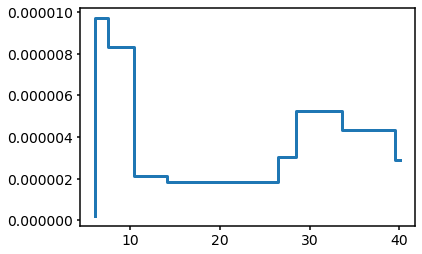

In [3]:
np.random.seed(42)
s.initialise_domain()
s.domain.ne = np.random.random(size=10) * 0.01 
s.domain.B = np.random.random(size=10) * 1e-5
s.domain.deltaL = np.random.random(size=10) * 10.0
redge = np.cumsum(s.domain.deltaL)
s.domain.phi = np.random.random(size=10) * 2.0 * np.pi
_ = plt.step(redge, s.domain.B, where="pre")

We can then compute the survival probability 

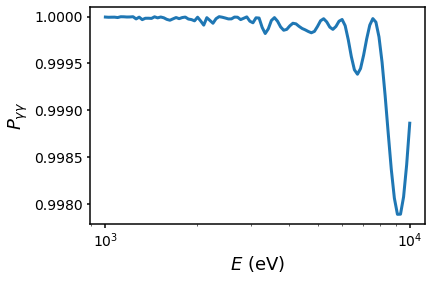

In [4]:
energies = np.logspace(3,4,100)
s.set_params(g = 1e-12 * 1e-9, mass = 1e-11)
s.propagate(energies=energies, pol="y")
fig = s.default_plot(mode="survival")

Alternatively, you may want to set up a cell-based model with a given density and magnetic field strength with radius, then initialise a random cell model. In this case we're just going to use some arbitrary functions, but you could use, for example, power-law profiles or a universal pressure profile to set these up. 

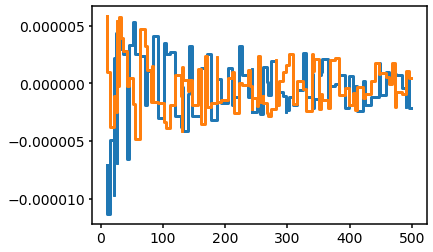

In [38]:
def get_B(r):
    return (1e-5 * (r/25.0)**-0.5)

def get_ne(r):
    return (0.1 * (r/25.0)**-2)

# this controls the size of each random cell. Normally chosen using a power-law, but you can use
# any function or supply a float for a constant cell size 
def coherence():
    return (np.random.random() * 10.0)

s = alpro.Survival("custom")      # initialise model 

# set up get_B and density methods 
s.cluster.get_B = get_B
s.cluster.density = get_ne

# initialise domain subclass using this profile
s.initialise_domain(s.cluster.profile)

# create a random cell model
s.domain.create_box_array(500.0, 1, coherence = coherence) 

# plot the model 
_ = plt.step(s.domain.r, s.domain.Bx, where="pre")
_ = plt.step(s.domain.r, s.domain.By, where="pre")

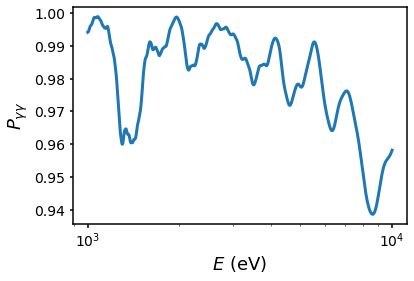

In [39]:
energies = np.logspace(3,4,1000)
s.set_params(g = 1e-12 * 1e-9, mass = 1e-13)
s.propagate(energies=energies, pol="both")
fig = s.default_plot(mode="survival")